In [272]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [85]:
np.arange(60,100, 5)

array([60, 65, 70, 75, 80, 85, 90, 95])

In [20]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [21]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

#My computer just crashed, sorry!
#np. Anthony is explaining scatter plots right now.

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [22]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree \(Emma\)
- Random Forest
- NEURAL NETWORKS  Thomas
- 
- Logistic Regression
- 
- Naive Bayes \(Jeffrey and Rhone\)
- Adaboost
- Support vector classifier
- 
- 
- Support vector classifier 
- KNN

<u>**AlSO TRY OPTIMIZING THEM**</u>

Grid Search CV

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [43]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [74]:
"""target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.3)"""

In [75]:
x_train.shape

(642, 11)

grid search cv

In [78]:
#ADABOOST
top_scores = [{'model': 0, 'mean_squared_error': 0}, {'model': 0, 'acc': 0}, {'model': 0, 'prec': 0}, {'model': 0, 'recall': 0}, {'model': 0, 'f1': 0}]
    
for i in range(100, 201):
    abc = AdaBoostClassifier(n_estimators=i)
    abc.fit(x_train, y_train)
    y_predictions = abc.predict(x_test)
    
    total_squared_error = (np.sum((y_test - y_predictions)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
    mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
    acc = accuracy_score(y_test, y_predictions)
    prec = precision_score(y_test, y_predictions)
    recall = recall_score(y_test, y_predictions)
    f1 = f1_score(y_test, y_predictions)
    
    results = [mean_squared_error, acc, prec, recall, f1]
    
    if top_scores[0]['mean_squared_error'] < results[0]:
        top_scores[0]['mean_squared_error'] = results[0]
        top_scores[0]['model'] = i
    if top_scores[1]['acc'] < results[1]:
        top_scores[1]['acc'] = results[1]
        top_scores[1]['model'] = i
    if top_scores[2]['prec'] < results[2]:
        top_scores[2]['prec'] = results[2]
        top_scores[2]['model'] = i
    if top_scores[3]['recall'] < results[3]:
        top_scores[3]['recall'] = results[3]
        top_scores[3]['model'] = i
    if top_scores[4]['f1'] < results[4]:
        top_scores[4]['f1'] = results[4]
        top_scores[4]['model'] = i
    
    
print(top_scores)


# total_squared_error = (np.sum((y_test - y_predictions)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
# mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
# print(mean_squared_error)
# sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='g')
# acc = accuracy_score(y_test, y_predictions)
# prec = precision_score(y_test, y_predictions, average='micro')
# recall = recall_score(y_test, y_predictions, average='micro')
# f1 = f1_score(y_test, y_predictions, average='micro')
# scores['Adaboost'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
# print(scores['Adaboost'])

[{'model': 183, 'mean_squared_error': 0.19927536231884058}, {'model': 103, 'acc': 0.8478260869565217}, {'model': 103, 'prec': 0.8478260869565217}, {'model': 103, 'recall': 0.8478260869565217}, {'model': 103, 'f1': 0.8478260869565218}]


{'accuracy': 0.7010869565217391, 'precision': 0.719626168224299, 'recall': 0.7549019607843137, 'f1_score': 0.736842105263158}


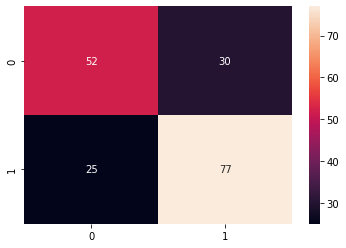

In [269]:
heart_dfs = heart_df.copy()
target = heart_dfs["HeartDisease"]
input_columns = heart_dfs.loc[:, heart_dfs.columns != "HeartDisease"]
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,stratify =y, random_state=42)
KNN_model = KNN(n_neighbors = 7)
KNN_model.fit(x_train, y_train)
y_hat = KNN_model.predict(x_test)

total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
#print(mean_squared_error)


sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])

In [152]:
#y_hat = KNN_model.predict(x_test)

In [270]:
#print(y_hat)
print(np.array(y_test))

"""total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)"""
"""sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])"""

[1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1]


"sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')\nacc = accuracy_score(y_test, y_hat)\nprec = precision_score(y_test, y_hat, average='micro')\nrecall = recall_score(y_test, y_hat, average='micro')\nf1 = f1_score(y_test, y_hat, average='micro')\nscores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}\nprint(scores['KNN'])"

[1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1]
0.1358695652173913
{'accuracy': 0.8641304347826086, 'precision': 0.8641304347826086, 'recall': 0.8641304347826086, 'f1_score': 0.8641304347826086}


/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


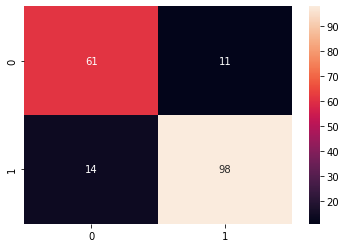

In [126]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [46]:
# Please save scores like the example below
        scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

[[60 11]
 [17 96]]
{'accuracy': 0.8478260869565217, 'precision': 0.8495575221238938, 'recall': 0.897196261682243, 'f1_score': 0.8727272727272727}


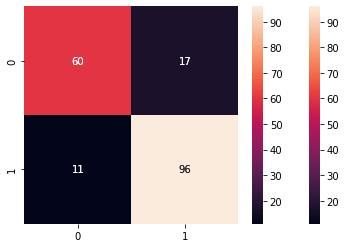

In [273]:
#x is everything but heart disease
x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
#y is heart disease
y = heart_df['HeartDisease']
# splits dataset; 80 percent train: 20 percent test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
#scales down the x values
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
classifier = LogisticRegression(random_state=42)
#Fits dataset
classifier.fit(x_train, y_train)
#gets predicted values
y_pred= classifier.predict(x_test)
#compares predictions to actual values
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
print(cm)
"""total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)"""

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
scores['LOGISTICREGRESSION'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['LOGISTICREGRESSION'])



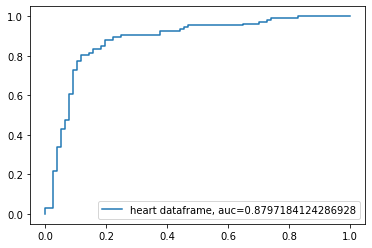

KeyError: 'key of type tuple not found and not a MultiIndex'

In [278]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="heart dataframe, auc="+str(auc))
plt.legend(loc=4)
plt.show()
fpr = dict()
tpr = dict()
roc_auc = dict()

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]




for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#This plots the tradeoff of positive rate to false positive rate(roc curve)
"""fitted_y = np.array(y_pred)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(heart_df.loc[:, heart_df.columns != "HeartDisease"],heart_df['HeartDisease'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_test,y_test,y_pred.reshape(x_test.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()"""

/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


{'accuracy': 0.8858695652173914, 'precision': 0.8785046728971962, 'recall': 0.9215686274509803, 'f1_score': 0.8995215311004785}


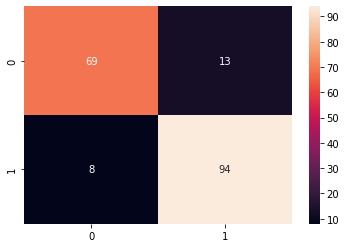

In [144]:
# define x as all columns but heart disease

X = heart_df.loc[:, heart_df.columns != "HeartDisease"]
X = (X - np.min(X)) / (np.max(X) - np.min(X))
#define y as heart_disease
y = heart_df['HeartDisease']
#split data set 80 percent train: 20 percent test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#create object model
gnb = GaussianNB()
#fit object model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# print("Naive Bayes score: ",gnb.score(X_test, y_test))
# print("Number of mislabeled points out of a total %d points : %d"


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
scores['NAIVEBAYES'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['NAIVEBAYES'])


In [64]:
(89)/(89+12)
(65)/(65+18)

0.7831325301204819

184

In [249]:
# SVC Model

#configuring the data
target = heart_df['HeartDisease']
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state = 45)

x_train.shape

(734, 11)

In [264]:
from sklearn.svm import SVC

#changing the kernel
my_SVC_model = SVC(kernel = 'rbf')

#fitting the model
my_SVC_model.fit(x_train, y_train)

SVC()

In [259]:
#predicting results
y_hat = my_SVC_model.predict(x_test)

In [260]:
y_hat

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1])

In [261]:
np.array(y_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1])

In [265]:
#MSE
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
#kernel on poly degree 3 gave .2771 /80/20
#kernel on linear gave .1467 /80/20
#kernel on rbf gave .1467 /80/20
#kernel on sigmoid gave  /80/20

#kernel on poly degree 3 gave  /70/30
#kernel on linear gave  /70/30
#kernel on rbf gave  /70/30
#kernel on sigmoid gave  /70/30

0.14673913043478262


Accuracy:  0.8532608695652174 f1 Score:  0.8601036269430051 Recall:  0.8924731182795699 Precision:  0.83


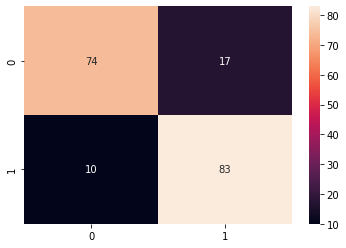

In [266]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
fone_score = f1_score(y_test, y_hat)
rec = recall_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)

#accuracy, f1 score, recall, precision
print("Accuracy: " , acc , "f1 Score: " , fone_score, "Recall: " , rec, "Precision: " , prec)
#kernel on poly degree 3 gave .7228, .7411, .7849, .7019 /80/20
#kernel on linear gave .8532, .8601, .8924, .83 /80/20
#kernel on rbf gave  /80/20
#kernel on sigmoid gave  /80/20

#kernel on poly degree 3 gave  /70/30
#kernel on linear gave  /70/30
#kernel on rbf gave  /70/30
#kernel on sigmoid gave  /70/30

In [0]:
from sklearn.model_selection import GridSearchCV

params = ['kernels': ['poly', 'linear', 'rbf', 'sigmoid'], 'degree': [0, 1, 2, 3, 4, 5, 6], 'c_value': [.1, 1, 10, 100, 1000], 'gamma': [.1, 1, 10, 100]]
my_SVC_model.GridSearchCV